In [1]:
from a6_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


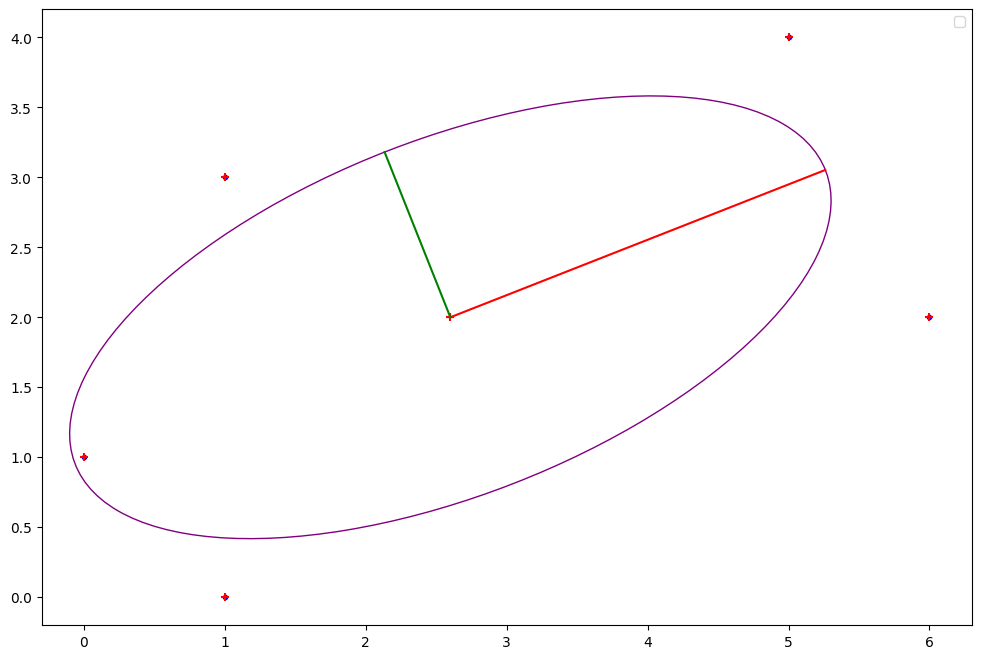

In [2]:
# (a) For our requirements, it is necessary only to correctly calculate eigenvectors and
# eigenvalues up to the scale factor. Therefore, implement the dual method according to
# the Algorithm 2 and test it using the data from points.txt.
points = np.loadtxt("data/points.txt")
plt.figure(figsize=(12, 8))
N = len(points)
X = points.T
mean = np.mean(points, axis=0)
plt.scatter(mean[0], mean[1], color='red', marker='+')
mean = mean.reshape(2, 1)
Xd = X - mean
C = np.dot(Xd, Xd.T) / (N - 1)
C2 = np.dot(Xd.T, Xd) / (N - 1)
U, S, VT = np.linalg.svd(C2)
U = np.dot(Xd, U) * np.sqrt(1 / (S * (N - 1)))
# mulitply each eigenvector with eigenvalue so the length isn't 1
U1 = U.T[0] * np.sqrt(S[0])
U2 = U.T[1] * np.sqrt(S[1])
Y = np.dot(U.T, Xd)
Xq = np.dot(U, Y) + mean
plt.scatter(points[:, 0], points[:, 1], color='blue', marker='.')
plt.scatter(mean[0], mean[1], color='red', marker='+')
plt.scatter(Xq[0], Xq[1], color='r', marker='+')
plt.plot([mean[0], mean[0] + U1[0]], [mean[1], mean[1] + U1[1]],
         color='r')
plt.plot([mean[0], mean[0] + U2[0]], [mean[1], mean[1] + U2[1]],
         color='g')
drawEllipse(mean, C)
plt.legend()
plt.show()
